# Quick, Draw! Simplified

##<u>***Objective***</u>

To create a model like that of [Google's Quickdraw game](https://quickdraw.withgoogle.com/) for selected classes and to experiment with alternate ML models and data pre-processing methods.

![](https://raw.githubusercontent.com/Jeremylsw/Deep-Learning/main/Images/Quickdraw_main.png)

A subset of data belonging to 20 classes are used in this notebook


In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
!wget -qq https://www.dropbox.com/s/gdlb8dnjzcly51o/quickdraw.zip
  
!unzip -qq quickdraw.zip

!rm -r __MACOSX
!rm quickdraw.zip

!ls

quickdraw  sample_data


In [ ]:
!ls quickdraw

'alarm clock.npy'   bee.npy		 cookie.npy	  lollipop.npy
 ambulance.npy	   'birthday cake.npy'	 donut.npy	 'palm tree.npy'
 angel.npy	    brain.npy		 eyeglasses.npy   pig.npy
 ant.npy	    cactus.npy		 face.npy	  postcard.npy
 banana.npy	    cat.npy		 fish.npy	  rainbow.npy


## Imports

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import numpy as np

from glob import glob
import ntpath

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import tensorflow as tf

In [ ]:
arr = np.load('./quickdraw/bee.npy')
arr.shape

(120890, 784)

In [ ]:
file_names = glob('./quickdraw/*.npy')

In [ ]:
# make some class names
class_names = []

for file in file_names:
  name = ntpath.basename(file)
  class_names.append(name[:-4])
  
  
print(class_names)

['cactus', 'eyeglasses', 'ant', 'palm tree', 'alarm clock', 'fish', 'cookie', 'rainbow', 'cat', 'postcard', 'ambulance', 'banana', 'angel', 'birthday cake', 'face', 'brain', 'lollipop', 'bee', 'donut', 'pig']


In [ ]:
# get 200 of each class for plotting

x_data =np.array([])
y_labels =np.array([])

for i, filename in enumerate(file_names):
  labels = [i for j in range(200)]
  arr = np.load(filename)
  arr = arr[:200]
  if len(x_data) == 0:
    x_data = arr
    y_labels = np.asarray(labels)
  else:
    x_data = np.concatenate((x_data, arr))
    y_labels = np.concatenate((y_labels, labels))

In [ ]:
y_labels.shape

(4000,)

In [ ]:
y_labels[190:210]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## For MNIST

In [ ]:
(mnist_x,mnist_y), (_,_) = tf.keras.datasets.mnist.load_data()
mnist_x =mnist_x.reshape(60000,784)

11493376/11490434 [==============================] - 0s 0us/step


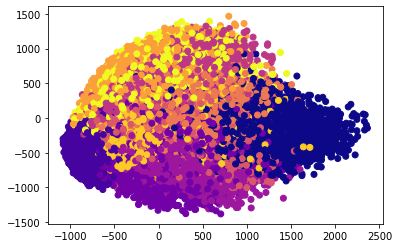

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(mnist_x)
groups = mnist_y.tolist()
colors = [int(i % 20) for i in groups]

plt.scatter(principalComponents[:,0], principalComponents[:,1], c=colors,cmap=plt.cm.plasma)
plt.show()

## PCA for QuickDraw

(2000, 2)


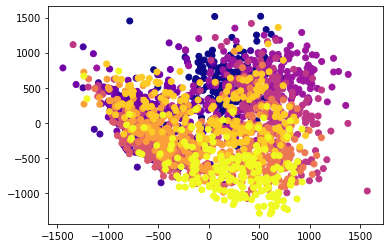

In [ ]:
# from sklearn.preprocessing import StandardScaler
# x = StandardScaler().fit_transform(x_data)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_data[:2000])

print(principalComponents.shape)

groups = y_labels.tolist()
colors = [int(i % 20) for i in groups[:2000]]

plt.scatter(principalComponents[:,0], principalComponents[:,1], c=colors,cmap=plt.cm.plasma)
plt.show()

## Plot TSNE  for QuickDraw

In [ ]:
import time

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x_data[:2000])

print('t-SNE Finished! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.118s...
[t-SNE] Computed neighbors for 2000 samples in 6.296s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 623.359397
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.251106
[t-SNE] KL divergence after 300 iterations: 1.902704
t-SNE Finished! Time elapsed: 12.725265741348267 seconds


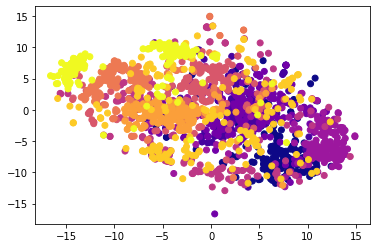

In [ ]:
import matplotlib.cm as cm

groups = y_labels.tolist()

colors = [int(i % 20) for i in groups[:2000]]

plt.scatter(tsne_results[:,0], tsne_results[:,1], c=colors,cmap=plt.cm.plasma)
plt.show()

In [ ]:
x_data =np.array([])
y_labels =np.array([])

for i, filename in enumerate(file_names):
  labels = [i for j in range(10000)]
  arr = np.load(filename)
  arr = arr[:10000]
  if len(x_data) == 0:
    x_data = arr
    y_labels = np.asarray(labels)
  else:
    x_data = np.concatenate((x_data, arr))
    y_labels = np.concatenate((y_labels, labels))

In [ ]:
x_data.shape, y_labels.shape

((200000, 784), (200000,))

In [ ]:
y_labels[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
# Shuffle
from sklearn.utils import shuffle

x_data, y_labels = shuffle(x_data, y_labels, random_state=42)


# Train test split
from sklearn.model_selection import train_test_split

split = 0.9

x_train, x_test, y_train, y_test = train_test_split(x_data, y_labels, test_size=0.1, random_state=42)


x_train.shape, y_train.shape

((180000, 784), (180000,))

In [ ]:
y_labels[:50]

array([11,  7, 15,  6,  3,  2, 13, 17, 13,  0,  7, 14, 18,  8, 11, 11, 10,
       18,  0, 17, 16,  3,  2, 15,  0,  0,  0, 13, 19,  4, 13,  0,  2,  0,
       11,  9,  3, 12,  1,  6,  6, 16,  5, 12, 14, 14, 13,  7, 19,  6])

In [ ]:
y_train[:50]

array([16, 19,  0,  9, 14, 15, 10,  2,  1,  6, 17,  1, 17,  9, 13, 16,  4,
        4,  3,  1,  5, 11,  2, 11, 10, 15, 18, 13,  1,  4, 19, 19, 18, 13,
       14, 16,  9,  1, 13,  5, 17,  6,  6, 19, 10, 17,  4,  2,  4, 11])

## Prepare data for network

## Data Pipeline

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(180000, 784)
(180000,)
(20000, 784)
(20000,)


In [ ]:
img_rows = 28
img_cols = 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

#Converting the ints to float for floating point math
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Standardizing the data to be between 0-1 --- Be careful to only do this once
x_train /= 255
x_test /= 255

In [ ]:
x_train.shape, x_test.shape

((180000, 28, 28, 1), (20000, 28, 28, 1))

In [ ]:
num_classes = len(class_names)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_train.shape, y_test.shape

((180000, 20), (20000, 20))

## Model

In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Input, Dense, Conv2D, BatchNormalization
from tensorflow.keras.layers import ReLU, Add, MaxPool2D, GlobalAvgPool2D
from tensorflow.keras.models import Model

In [ ]:
def Conv_BatchNorm(x, filters, kernel_size, strides):
    x = Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x

In [ ]:
def identity_block(orig_x, num_filters):
    x = Conv_BatchNorm(orig_x, filters=num_filters, kernel_size=1, strides=1)
    x = Conv_BatchNorm(x, filters=num_filters, kernel_size=3, strides=1)
    x = Conv2D(filters=4*num_filters, kernel_size=1, strides=1)(x)  # notice: filters=4*num_filters
    x = BatchNormalization()(x)
 
    x = Add()([x, orig_x])
    x = ReLU()(x)
    return x

In [ ]:
def projection_block(tensor, num_filters, strides):
    # left stream
    x = Conv_BatchNorm(tensor, filters=num_filters, kernel_size=1, strides=1) 
    x = Conv_BatchNorm(x, filters=num_filters, kernel_size=3, strides=strides)
    x = Conv2D(filters=4*num_filters, kernel_size=1, strides=1)(x)  # notice: filters=4*num_filters
    x = BatchNormalization()(x)
 
    # right stream
    proj_x = Conv2D(filters=4*num_filters, kernel_size=1, strides=strides)(tensor)  # notice: filters=4*num_filters
    proj_x = BatchNormalization()(proj_x)
 
    x = Add()([x, proj_x])
    x = ReLU()(x)
    return x

In [ ]:
def resnet_block(x, filters, reps, strides):
    x = projection_block(x, num_filters=filters, strides=strides)
    for _ in range(reps-1):
        x = identity_block(x, num_filters=filters)
    return x

In [ ]:
input = Input(shape=input_shape)
 
x = Conv_BatchNorm(input, filters=64, kernel_size=7, strides=2)  # [3]: 7x7, 64, strides 2
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)  # [3]: 3x3 max mool, strides 2
 
x = resnet_block(x, filters=64, reps=3, strides=1)
x = resnet_block(x, filters=128, reps=4, strides=2)  # strides=2 ([2]: conv3_1)
x = resnet_block(x, filters=256, reps=6, strides=2)  # strides=2 ([2]: conv4_1)
x = resnet_block(x, filters=512, reps=3, strides=2)  # strides=2 ([2]: conv5_1)
 
x = GlobalAvgPool2D()(x)  # [3]: average pool *it is not written any pool size so we use Global
 
output = Dense(20, activation='softmax')(x)  # [3]: 1000-d fc, softmax
model = Model(input, output)

## Train

In [ ]:
batch_size = 128
epochs = 20
learning_rate = 0.001

In [ ]:
#optimizer
opt = tf.keras.optimizers.Adam(lr = learning_rate)

model.compile(loss= tf.keras.losses.categorical_crossentropy, #'categorical_crossentropy'
              optimizer= opt,
              metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks = None,
          validation_data=(x_test, y_test))

Epoch 1/20
1407/1407 [==============================] - 81s 54ms/step - loss: 0.3410 - accuracy: 0.9051 - val_loss: 0.3936 - val_accuracy: 0.8888
Epoch 2/20
1407/1407 [==============================] - 76s 54ms/step - loss: 0.3007 - accuracy: 0.9130 - val_loss: 0.3628 - val_accuracy: 0.9010
Epoch 3/20
1407/1407 [==============================] - 76s 54ms/step - loss: 0.2644 - accuracy: 0.9240 - val_loss: 0.5467 - val_accuracy: 0.8533
Epoch 4/20
1407/1407 [==============================] - 76s 54ms/step - loss: 0.2893 - accuracy: 0.9172 - val_loss: 0.4287 - val_accuracy: 0.8856
Epoch 5/20
1407/1407 [==============================] - 76s 54ms/step - loss: 0.2632 - accuracy: 0.9236 - val_loss: 0.2889 - val_accuracy: 0.9199
Epoch 6/20
1407/1407 [==============================] - 76s 54ms/step - loss: 0.2220 - accuracy: 0.9363 - val_loss: 0.3239 - val_accuracy: 0.9102
Epoch 7/20
1407/1407 [==============================] - 75s 54ms/step - loss: 0.3779 - accuracy: 0.8964 - val_loss: 0.3086 -

## Evaluate 

In [ ]:
model.evaluate(x_test, y_test)

625/625 [==============================] - 8s 12ms/step - loss: 0.4521 - accuracy: 0.9146


[0.4521492123603821, 0.9145500063896179]